In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/DM_Project_Churn_rate/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#Splitting the data into train and test sets

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

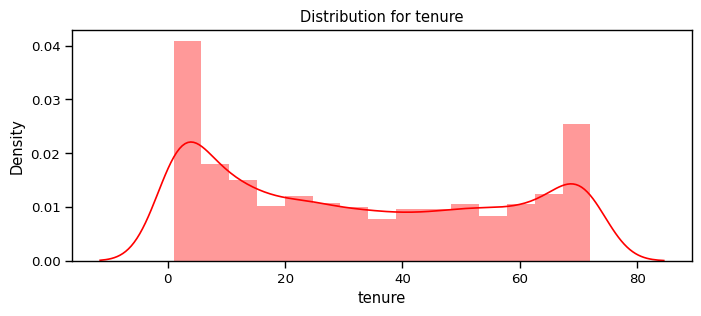

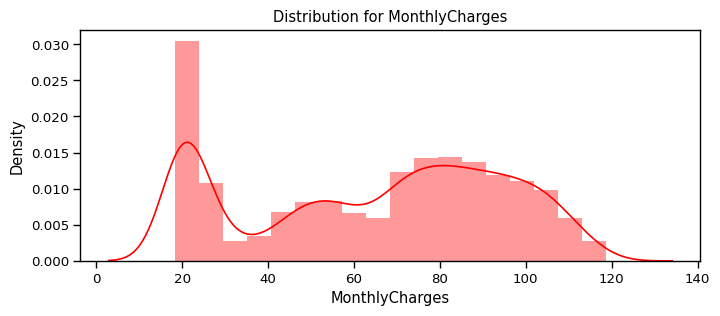

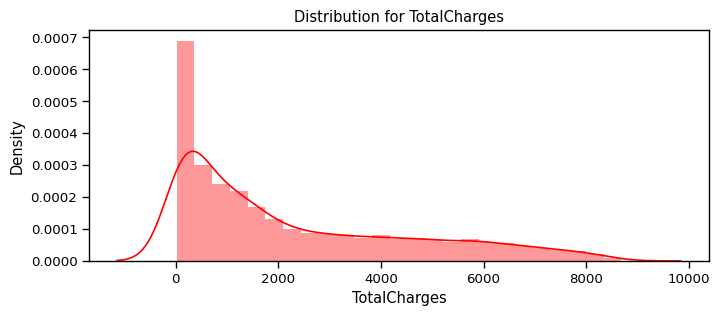

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

* Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

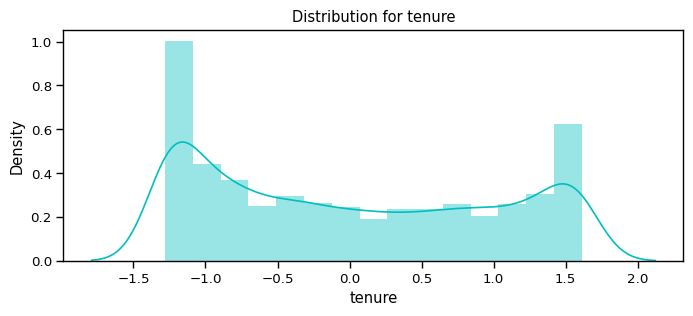

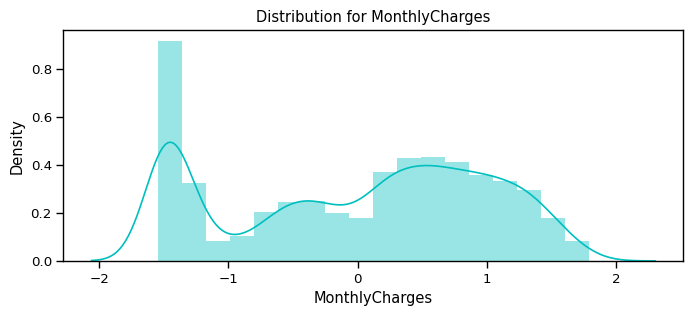

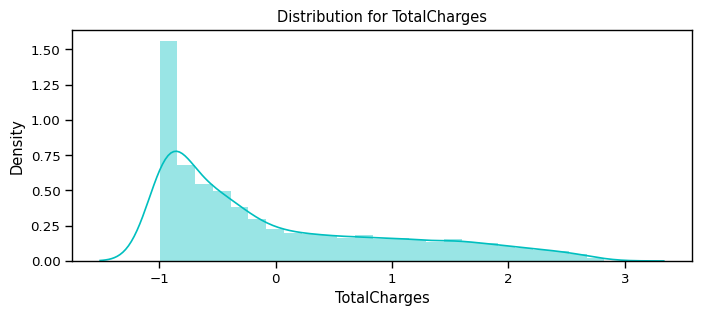

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories. One for standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

**KNN**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



**SVC**

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



**Random Forest**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



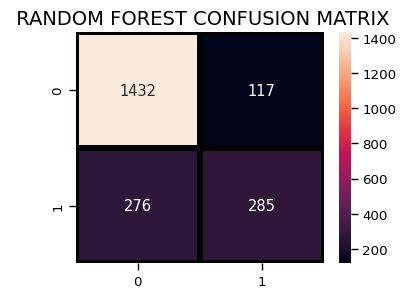

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

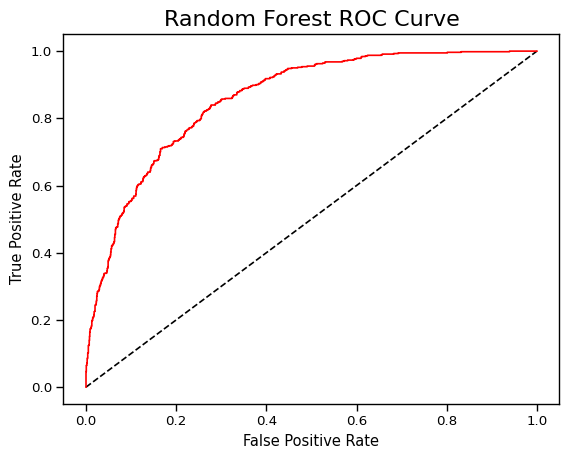

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

**Logistic Regression**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



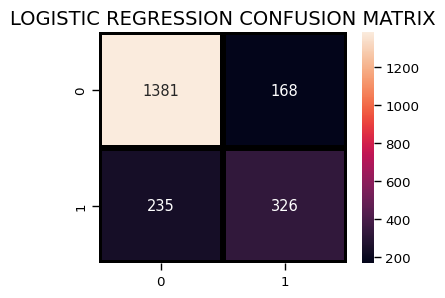

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

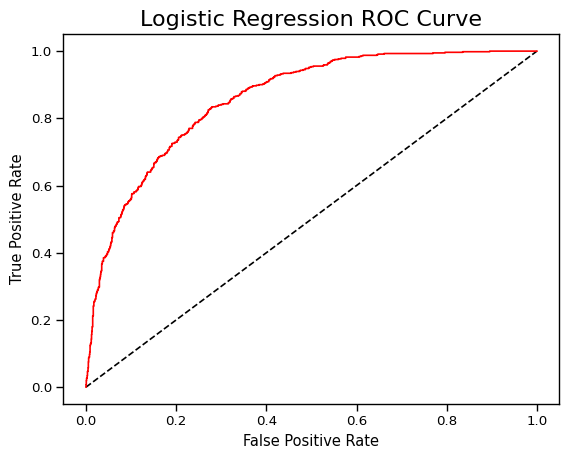

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

**Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7279620853080568


* Decision tree gave very low score.

In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.49      0.53      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



**AdaBoost Classifier**

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8075829383886256

In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



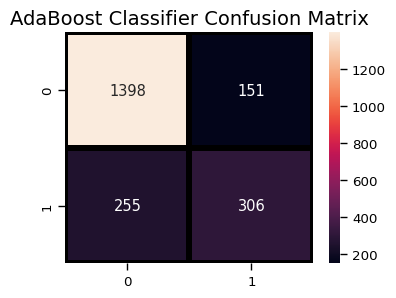

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

**Gradient Boosting Classifier**

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8080568720379147


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



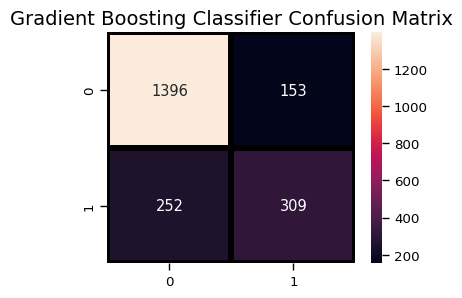

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

**Voting Classifier**

Let's now predict the final model based on the highest majority of voting and check it's score.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8165876777251185


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



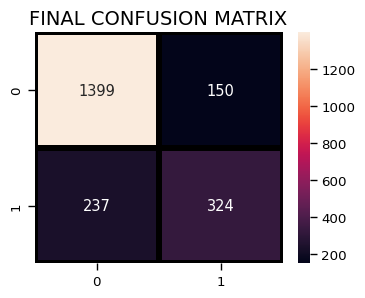

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

From the confusion matrix we can see that: There are total 1399+150=1549 actual non-churn values and the algorithm predicts 1399 of them as non churn and 150 of them as churn. While there are 237+324=561 actual churn values and the algorithm predicts 237 of them as non churn values and 324 of them as churn values.